In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
error_value = 9999.9

In [5]:
f = open("MonthElb_012010_004028900.csv")
file = f.readlines()

In [6]:
#dizionario = {"DATA":[], "ORA":[], "ID_RETE_MONIT":[], "CODICE_ISTAT_COMUNE":[], "PROGR_PUNTO_COM":[], "VELV":[],
#              "DIRV":[], "DEVST":[], "BARO":[], "TERMA":[], "IGRO":[], "RADD":[], "RADR":[], "PLUV":[]}
dizionario = {"VELV":[], "BARO":[], "TERMA":[], "IGRO":[], "PLUV":[]}
header = ["VELV", "BARO", "TERMA", "IGRO", "PLUV"]     #dizionario.keys()
posizione_campi = [5, 8, 9, 10, 13]
for riga in file:
    r = riga.split(",")
    r[-1] = r[-1].strip()
    #prendo solo campi utili a me
    campi_utili = [float(r[i]) for i in posizione_campi]
    
    if error_value not in campi_utili:
        for chiave, valore in zip(header, campi_utili):   #campi_utili
            #print(chiave, valore)
            #dizionario[chiave].append(float(r[valore]))
            dizionario[chiave].append(valore)
            
        """dizionario["VELV"].append(campi_utili[])
        dizionario["BARO"].append(float(r[8]))
        dizionario["TERMA"].append(float(r[9]))
        dizionario["IGRO"].append(float(r[10]))
        dizionario["PLUV"].append(float(r[13]))"""

In [7]:
for chiave in dizionario:
    dizionario[chiave] = np.array(dizionario[chiave])
dizionario

{'VELV': array([0.4, 0. , 0.6, ..., 1.3, 1.3, 1.8]),
 'BARO': array([925.7, 925.1, 924.6, ..., 952.8, 953. , 952.9]),
 'TERMA': array([ 1.3,  1.3,  1.4, ..., -3.9, -4.5, -4.5]),
 'IGRO': array([ 84.,  84.,  84., ..., 100., 100., 100.]),
 'PLUV': array([0., 0., 0., ..., 0., 0., 0.])}

In [1]:
#caratteristiche = ["VELV", "BARO", "TERMA", "IGRO", "PLUV"]
#n = len(caratteristiche)
n = len(dizionario.keys())
fig, axs = plt.subplots(n, n, figsize = (32,32))
for j, dato_y in enumerate(dizionario.keys()):      #len(caratteristiche)
    for i, dato_x in enumerate(dizionario.keys()):
        if i != j:
            
            axs[j,i].scatter(dizionario[dato_x], dizionario[dato_y], c = 'orange', alpha = 0.5)
            axs[j,i].set_xlabel(dato_x, fontsize = 14)
            axs[j,i].set_ylabel(dato_y, fontsize = 14)
            
        else:
            axs[j,i].hist(dizionario[dato_x], color = 'orange', ec = 'black')
            axs[j,i].set_xlabel(dato_x, fontsize = 14)
            
fig.suptitle("Misure meteorologiche Boves", fontsize = 40)
plt.show()

NameError: name 'dizionario' is not defined

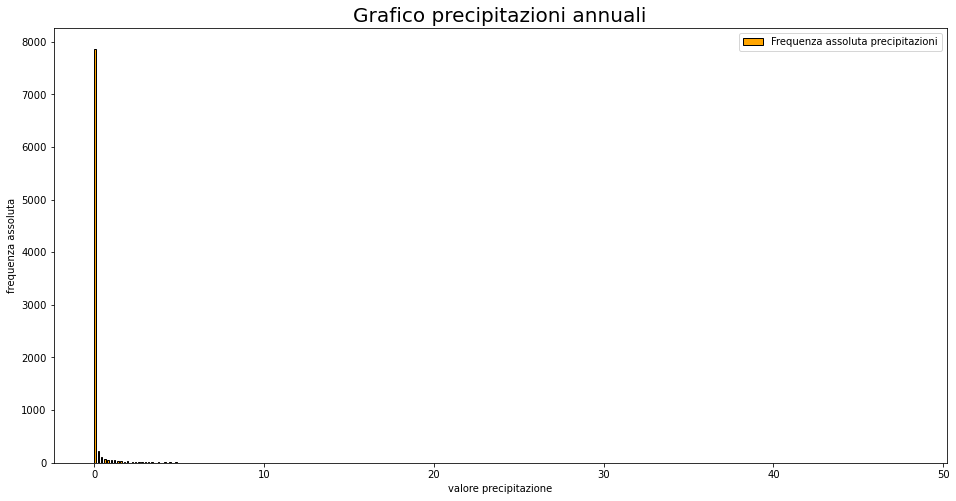

In [9]:
# grafico precipitazioni
fig, ax = plt.subplots(figsize = (16,8))

ax.hist(dizionario["PLUV"], bins = 500, label = "Frequenza assoluta precipitazioni", color = 'orange', ec = 'black')

ax.set_title("Grafico precipitazioni annuali", fontsize = 20)
ax.set_xlabel("valore precipitazione")
ax.set_ylabel("frequenza assoluta")
ax.legend()
plt.show()